# 06625 Project: Simulating a partial differential equation: Fitzhugh－Nagumo Equation of a reaction－diffusion system 

### Team 06: Rongkun Wang, Dan Liu

##1. Fitzhugh-Nagumo Equation of a reaction － diffusion system 

###1.1 Partial Differential Equations (PDEs)

Before learning about the FitzHugh － Nagumo Equation, we need to study the Partial Differential Equations (PDEs) first. 

In mathematics, a partial differential equation (PDE) is an equation which imposes relations between the various partial derivatives of a multivariable function. PDEs describe the evolution of dynamical systems involving both time and space. There are lots of application of PDEs in physics field (such as sound, heat, electromagnetism, fluid flow, and elasticity), biology field (such as tumor growth, population dynamics, and epidemic propagations), and so on.

It is hard to solve PDEs by hand and we prefer to use some techinical method and numerical simulations to solve the PDEs, such as FitzHugh–Nagumo equation.

###1.2 FitzHugh － Nagumo Equation

The FitzHugh–Nagumo model ( FHN ), named after Richard FitzHugh (1922–2007) who suggested the system in 1961 and J. Nagumo et al . who created the equivalent circuit the following year, describes a prototype of an excitable system (eg, a neuron ). And the equations to describe the dynamical system is:

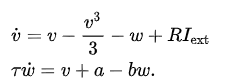

In this project, we will illustrate how to use FitzHugh–Nagumo equation to  simulate a reaction-diffusion system described by PDEs. A reaction-diffusion system models the evolution of one or several variables subject to two processes: reaction (transformation of the variables into each other) and diffusion (spreading across a spatial region). Some chemical reactions can be described by this type of model, but there are other applications in physics, biology, ecology, and other disciplines.

To illustrate the process better, we choose two different case for this FitzHugh–Nagumo equation of a reaction－diffusion system

- Alan Turing animal coat pattern formation

- Wood texture image processing


##2. Alan Turing animal coat pattern formation

In this part, we will simulate a system that has been proposed by Alan Turing as a model of animal coat pattern formation. Two chemical substances influencing skin pigmentation interact according to a reaction-diffusion model. This system is responsible for the formation of patterns that are reminiscent of the pelage of zebras, jaguars, and giraffes. 

We will simulate this system which consists of discretizing time and space and replacing the derivatives with their discrete equivalents via two different methods:

- PYTHON with the finite difference method

- COMSOL with the model build up and PDEs calculation

### 2.1 PYTHON with the finite difference method

This case is simulated with the following PDEs over the domain of E=[-1,1]^2:

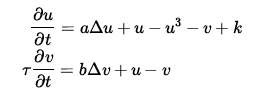

The variable represents the concentration of a substance favoring skin pigmentation, whereas represents another substance that reacts with the first and impedes pigmentation.

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

1. Discrete time and space

The time step dt must be small enough to ensure the stability of the numerical simulation.

In [ ]:
size = 100       # size of the 2D grid
dx = 2. / size   # space step
T = 9.0          # total time
dt = .001        # time step
n = int(T / dt)  # number of iterations

2. Initialize the variable u and v, define the parameters of the model

The matrices and contain the values of these variables on
the vertices of the 2D grid. These variables are initialized with a uniform noise between 0 and 1.

In [ ]:
# initialize the variable U and V
U = np.random.rand(size, size)
V = np.random.rand(size, size)

# define the parameters of the model
a = 2.8e-4
b = 4e-3
tau = .2
k = -.005
# if we change any parameters of the model, the animal coat pattern will change a lot.
# only certain combination of the parameters could lead to certain patterns.

3. Define the discrete Laplace operator

Using a five-point stencil finite difference method, we can define the discrete Laplace operator as the following:

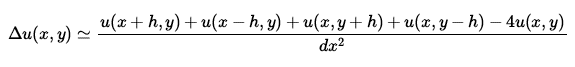

In [ ]:
def laplacian(Z):
    Ztop = Z[0:-2, 1:-1]
    Zleft = Z[1:-1, 0:-2]
    Zbottom = Z[2:, 1:-1]
    Zright = Z[1:-1, 2:]
    Zcenter = Z[1:-1, 1:-1]
    return (Ztop + Zleft + Zbottom + Zright -
            4 * Zcenter) / dx**2

4. Define the function to display the matrix

In [ ]:
def show_patterns(U, ax=None):
    ax.imshow(U, cmap=plt.cm.copper,
              interpolation='bilinear',
              extent=[-1, 1, -1, 1])
    ax.set_axis_off()

5. Using finite difference method to simulate the system

The PDEs of Fitzhugh－Nagumo Equation can be transformed into:

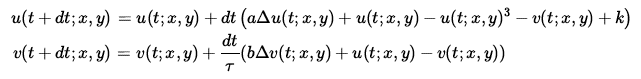

And we can use this equations to update the variables.

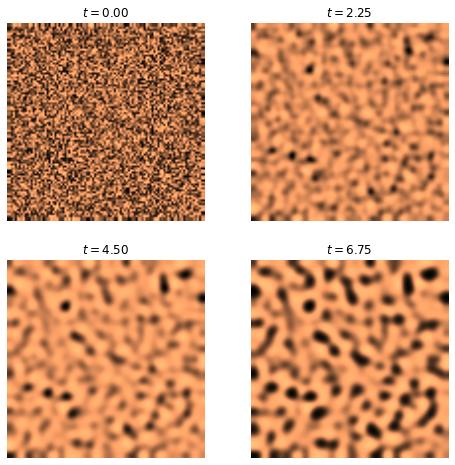

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
step_plot = n // 4
# We simulate the PDE with the finite difference method.
for i in range(n):
    # We compute the Laplacian of u and v.
    deltaU = laplacian(U)
    deltaV = laplacian(V)
    # We take the values of u and v inside the grid.
    Uc = U[1:-1, 1:-1]
    Vc = V[1:-1, 1:-1]
    # We update the variables.
    U[1:-1, 1:-1], V[1:-1, 1:-1] = \
        Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k),\
        Vc + dt * (b * deltaV + Uc - Vc) / tau
    # Neumann conditions: derivatives at the edges are null.
    for Z in (U, V):
        Z[0, :] = Z[1, :]
        Z[-1, :] = Z[-2, :]
        Z[:, 0] = Z[:, 1]
        Z[:, -1] = Z[:, -2]

    # We plot the state of the system at 4 different times.
    if i % step_plot == 0 and i < 4 * step_plot:
        ax = axes.flat[i // step_plot]
        show_patterns(U, ax=ax)
        ax.set_title(f'$t={i * dt:.2f}$')

Here, if we change the parameters a, b, tau, k of the model, the output patterns would change a lot. 

### 2.2 COMSOL with the model build up and PDEs calculation


In COMSOL, there are several PDE solvers. Here I used `General Form PDE`.

Here are the steps:


1.   Set up a new file in 2D model
2.   Add `General Form PDE` solver from `Mathematics` >`PDE Interfaces`
3.   In the Select Study tree, add `Time Dependent` study
4.   Set parameters:

   a	= 2.8e-4	
   b	= 5e-3   \
   tau = .1    \
   k	= -.005
   
5.   Set `Unit System` as None
6.   Add `Square` in `Geometry`, and set the side length as 0.02. Then set (0,0) as the center of the square
7.   In `General Form PDE` solver:

*   Set the value of `Conservative Flux` $\tau$: (a * ux, 0), (b * vx, 0)

*   Set the value of `Source Term` $f$: u-u*3-v+k, u-v
*   Set the value of `Damping or Mass Coefficient` $d_a$: (1, 0), (0, tau)
*   Set the value of `Mass Coefficient` $e_a$: (0, 0), (0, 0)

*   Set initial values: u = 0, $\frac{\partial u}{\partial x}$ = 0, v = 0, $\frac{\partial u}{\partial x}$ = 0
*   Add `Dirichlet Boundary Condition`, and select all boundaries

8.   In `Time Dependent` setting page, input 'range(0, 0.001, 9)' as `Output times`. That means COMSOL will compute from 0s to 9s, and the step of time is 0.001
9.   Click `Compute`



t=0.000s, t=1.000s, t=2.580s

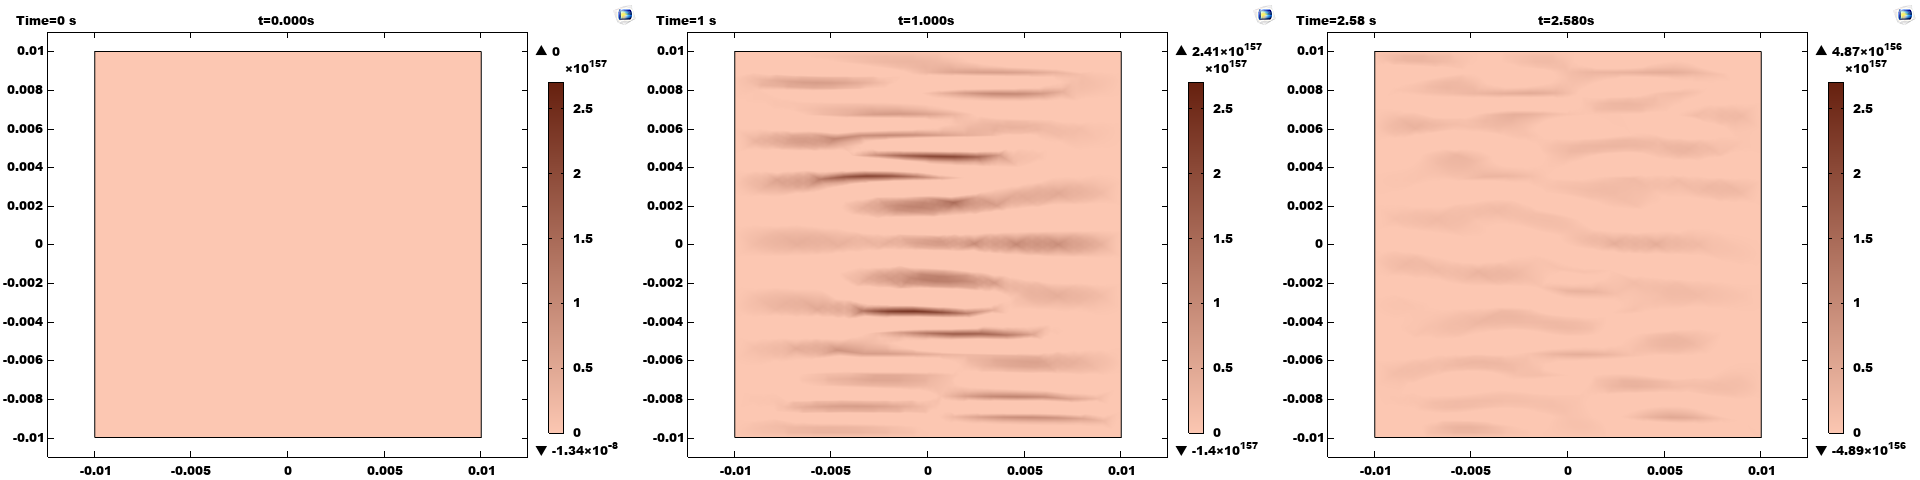

t=3.000s, t=3.694s, t=4.000s

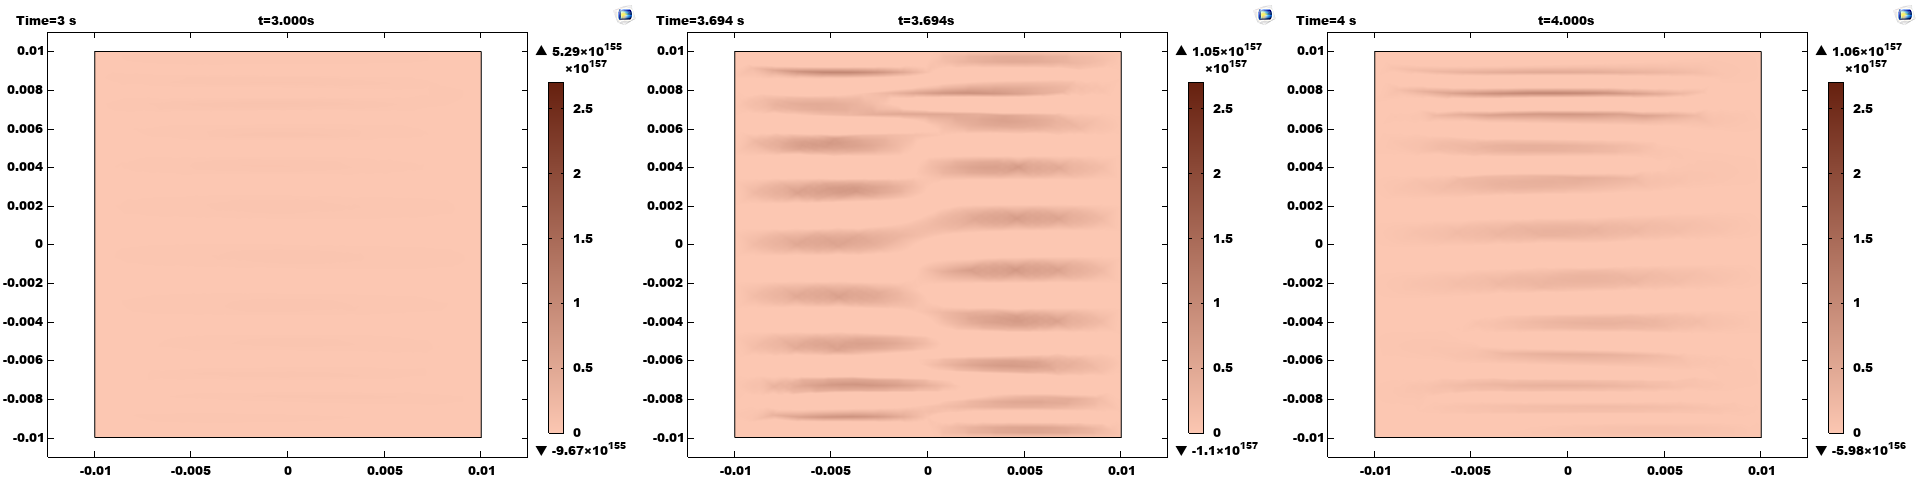

t=4.140s, t=5.000s, t=5.388s

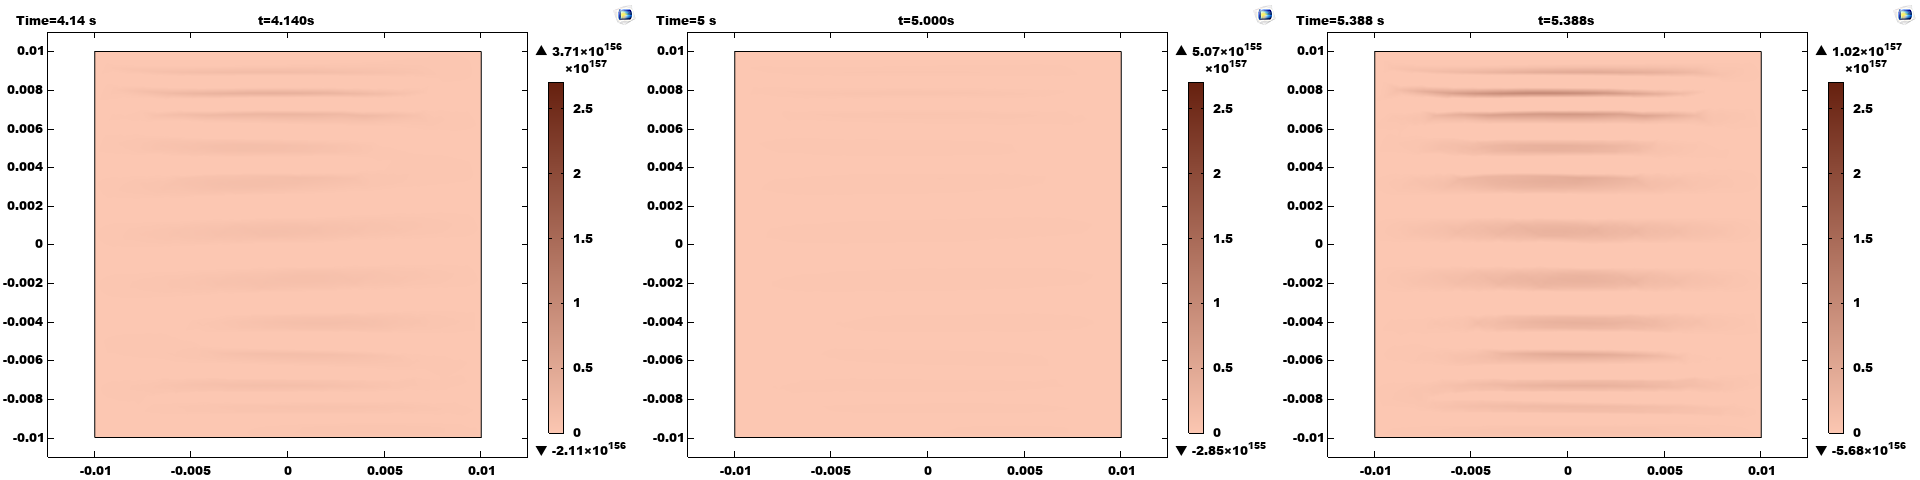

t=6.000s, t=6.465s, t=7.000s

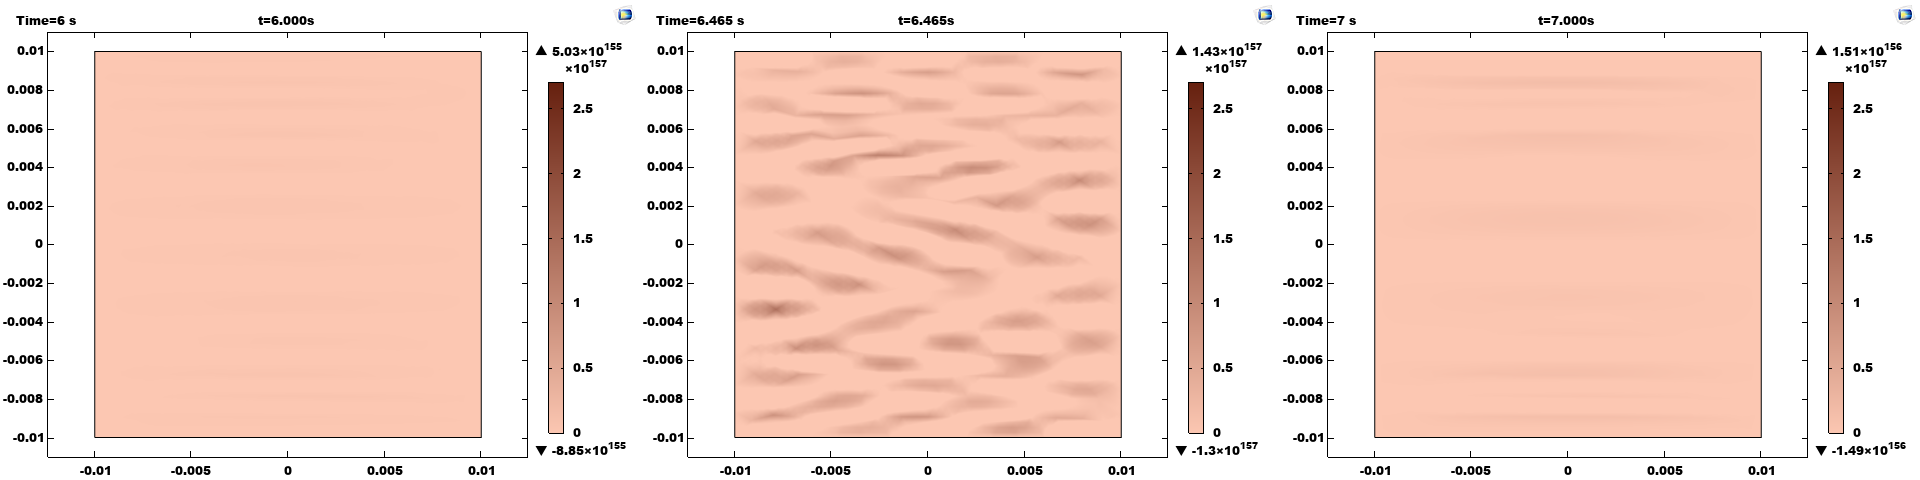

t=7.342s, t=8.000s, t=9.000s

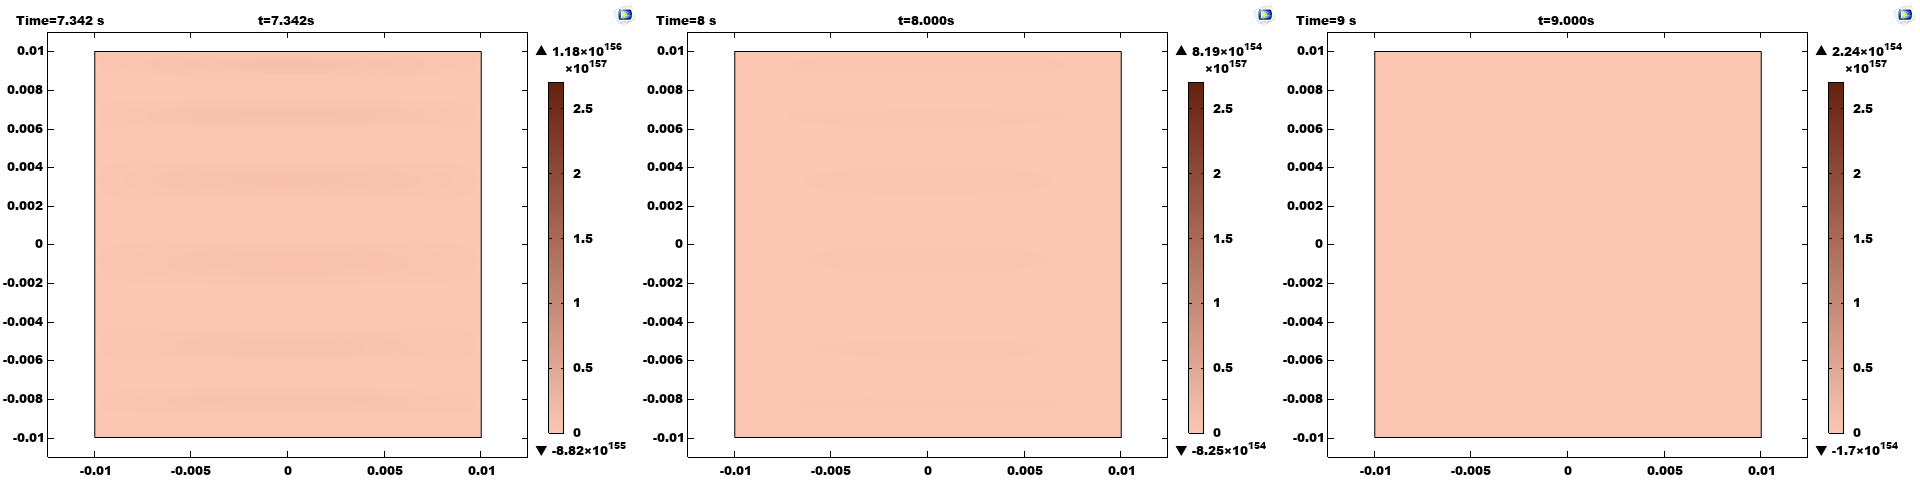

The animated plots (From t=0.0000s to t=9.000s)

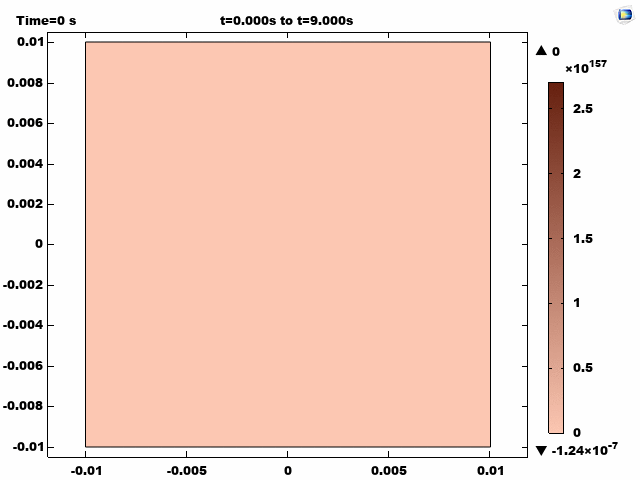

The COMSOL files are in Rongkun Wang's Github repository: 
https://github.com/epines1911/625f2020final

##3. Wood Texture Image Processing



Wood texture has the information about the growth of trees, and is the direct way to know about trees for human beings. Aiming at this kind of natural phenomenon, the Fitzhugh-Nagumo Equation of a reaction－diffusion system can be used to explore the wood texture images.

Here, we want to simulate this reaction-diffusion system.

In this models, we have two variables $u$ and $v$ which are distributed across a grid of size $N$. The symbol $u_{ij}$ represents the concentration of $u$ at grid coordinates $(i,j)$ (similar for $v$).

The discrete reaction-diffusion update equations are:

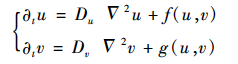

where,

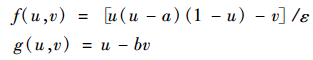

The above equation could be written as:

$$
u_{ij}(t+1) = u_{ij}(t) + \Big[D_u (\nabla^2 u)_{ij} + \frac{u_{ij}(u_{ij}-a)(1-u_{ij})-v_{ij}}{\epsilon} \Big]\times\Delta t\\
v_{ij}(t+1) = v_{ij}(t) + \Big[D_v (\nabla^2 v)_{ij} + u_{ij} - b v_{ij} \Big]\times\Delta t
$$

Then, we can did the similar steps on the system as what we did in part 2.2. 

1. Discretized Laplacian

The discretized Laplacian of a grid cell $(i,j)$ can be computed by summing over neighboring cells and subtract the value of the original cell with the total weight. One possible implementation is to only recognize direct neighbors of grid difference $\Delta=1$, i.e. at $(i,j-1)$, $(i,j+1)$, $(i-1,j)$, and $(i+1,j)$.

The whole update formula is

$$
(\nabla^2 u)_{ij} = u_{i,j-1} + u_{i,j+1} + u_{i-1,j} + u_{i+1,j} - 4u_{ij}
$$

We can do this efficiently in `numpy`. Firstly, let's first define a small concentration matrix `u`.

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
u = np.ones((3,3))
u[1,1] = 0

right_neighbor = np.roll(u, # the matrix to permute
                         (0,-1), # we want the right neighbor, so we shift the whole matrix -1 in the x-direction)
                         (0,1), # apply this in directions (y,x)
                        )

def discrete_laplacian(M):
    """Get the discrete Laplacian of matrix M"""
    L = -4*M
    L += np.roll(M, (0,-1), (0,1)) # right neighbor
    L += np.roll(M, (0,+1), (0,1)) # left neighbor
    L += np.roll(M, (-1,0), (0,1)) # top neighbor
    L += np.roll(M, (+1,0), (0,1)) # bottom neighbor
    
    return L

discrete_laplacian(u)

array([[ 0., -1.,  0.],
       [-1.,  4., -1.],
       [ 0., -1.,  0.]])

2. Apply discrete reaction-diffusion update equations

Take the concentration matrices and apply the update formula.

In [ ]:
def gray_scott_update(u, v, Du, Dv, a, b, epsilon, delta_t):
    
    # Updates a concentration configuration 
    # Let's get the discrete Laplacians first
    Lu = discrete_laplacian(u)
    Lv = discrete_laplacian(v)
    
    # Now apply the update formula
    diff_u = (Du*Lu + (u*(u-a)*(1-u)-v)/epsilon) * delta_t
    diff_v = (Dv*Lv + u - b*v) * delta_t
    
    u += diff_u
    v += diff_v
    
    return u, v

3. Choose initial conditions

It is of great importance to choose the intial conditions. If we fail to choose a good initial condition, it will be hard to get the expected results. Here we choose to build up a homogeneous distribution of chemicals with a small disturbance which can then produce some patterns. We can also add a bit of noise on them as the followings:

In [ ]:
def get_initial_configuration(N, random_influence=0.2):
    """
    Initialize a concentration configuration. N is the side length
    of the (N x N)-sized grid.
    `random_influence` describes how much noise is added.
    """
    
    # We start with a configuration where on every grid cell 
    # there's a lot of chemical A, so the concentration is high
    u = (1-random_influence) * np.ones((N,N)) + random_influence * np.random.random((N,N))
    
    # Let's assume there's only a bit of B everywhere
    v = random_influence * np.random.random((N,N))
    
    # Now let's add a disturbance in the center
    N2 = N//2
    radius = r = int(N/10.0)
    
    u[N2-r:N2+r, N2-r:N2+r] = 0.50
    v[N2-r:N2+r, N2-r:N2+r] = 0.25
    
    return u, v

Draw the intial configuration.

In [ ]:
def draw(u,v):
    """draw the concentrations"""
    fig, ax = plt.subplots(1,2,figsize=(5.65,4))
    ax[0].imshow(u, cmap='Greys')
    ax[1].imshow(v, cmap='Greys')
    ax[0].set_title('u')
    ax[1].set_title('v')
    ax[0].axis('off')
    ax[1].axis('off')

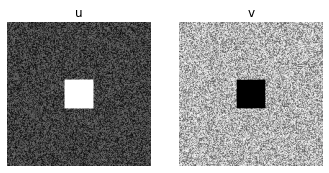

In [ ]:
u, v = get_initial_configuration(200)
draw(u,v)

4. Define the parameters of the model

Those parameters have great influence on the simulation patterns. If we change the parameters, the patterns would be different.

In [ ]:
# update in time
delta_t = 10e-3

# Diffusion coefficients
Du = 0.01
Dv = 0.25

# define the value of parameters a, b and epsilon
a = 1/6
b = 1
epsilon = 10e-3

# grid size
N = 20

# simulation steps
N_simulation_steps = 10000

5. Simulate the system

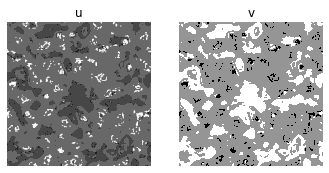

In [ ]:
u, v = get_initial_configuration(200)

for t in range(N_simulation_steps):
    u, v = gray_scott_update(u, v, Du, Dv, a, b, epsilon, delta_t)
    
draw(u,v)

As we can see, we can use PYTHON to solve the PDEs to get the concentration of two different substance u and v.

##4.Plotly

`Plotly` could be used to make interactive, publication-quality graphs. People could use plotly to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, even animations. \
`Plotly.py` is free and open source. \\
[Plotly Python Open Source Graphing Library](https://plotly.com/python/)

If we want to make a movie, we can use plotly to realize that.

##5. Summary

Fitzhugh－Nagumo Equation is an important equation for a reaction－diffusion system. And PDEs are related with solving these problems. Using finite different method to update the concentration with PYTHON could get the relationship between the dynamic changes of the concentration and time. Also, we can use the COMSOL to build up the model and solve the PDEs as well. Both methods are useful and efficient.